In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv('Argentina Well Data Science Challenge_M.csv',encoding='latin-1')
df.head()

,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Drilling_Start,Drilling_end,Completion_Date,Reservoir,play_name,state_name,well_cost
0,9.100000e+13,V,EM-524,El Medanito (EMD),YPF S.A.,-37.969224,-68.005922,5091.0,6/3/1972,6/17/1972,1/1/1900,Sierras Blancas,Unassigned,Río Negro,357666.4496
1,8.900000e+13,V,a-64,Bella Vista (Z054),YPF S.A.,-45.836407,-67.626993,6561.0,11/20/1983,12/17/1983,1/10/1984,Grupo Chubut,Unassigned,Chubut,819097.2687
2,8.800000e+13,V,NLCa-114,Los Cavaos (CAV),YPF SA,-36.077898,-69.661295,8234.0,10/14/1989,11/20/1989,1/10/1990,Chachao,Unassigned,Mendoza,789874.9054
3,9.500000e+13,V,LP-1260,Los Perales (PER),YPF SA,-46.269223,-69.125972,4393.0,12/11/1996,12/17/1996,1/10/1997,Bajo Barreal,Unassigned,Santa Cruz,631922.8338
4,9.100000e+13,V,SP-96,Senal Picada (SPI),YPF S.A.,-37.660822,-68.208660,3057.0,12/10/1966,12/31/1966,1/11/1967,Quintuco,Unassigned,Río Negro,124322.8550


In [3]:
df.count()

Well ID            1998
Well type code     1998
well_number        1998
Field_Name         1998
Operator           1998
latitude           1998
longitude          1998
Measured_Depth     1537
Drilling_Start      885
Drilling_end        885
Completion_Date     836
Reservoir          1998
play_name          1998
state_name         1998
well_cost          1998
dtype: int64

There's lots of missing values in Measured_Depth, Drilling_Start, Drilling_end, Completion_Date 

In [4]:
df['Drilling_end']=pd.to_datetime(df['Drilling_end']) 
df['Drilling_Start']=pd.to_datetime(df['Drilling_Start']) 

In [5]:
df['Drilling_Time'] = (df['Drilling_end'] - df['Drilling_Start']).dt.days

In [6]:
df.head()

,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Drilling_Start,Drilling_end,Completion_Date,Reservoir,play_name,state_name,well_cost,Drilling_Time
0,9.100000e+13,V,EM-524,El Medanito (EMD),YPF S.A.,-37.969224,-68.005922,5091.0,1972-06-03,1972-06-17,1/1/1900,Sierras Blancas,Unassigned,Río Negro,357666.4496,14.0
1,8.900000e+13,V,a-64,Bella Vista (Z054),YPF S.A.,-45.836407,-67.626993,6561.0,1983-11-20,1983-12-17,1/10/1984,Grupo Chubut,Unassigned,Chubut,819097.2687,27.0
2,8.800000e+13,V,NLCa-114,Los Cavaos (CAV),YPF SA,-36.077898,-69.661295,8234.0,1989-10-14,1989-11-20,1/10/1990,Chachao,Unassigned,Mendoza,789874.9054,37.0
3,9.500000e+13,V,LP-1260,Los Perales (PER),YPF SA,-46.269223,-69.125972,4393.0,1996-12-11,1996-12-17,1/10/1997,Bajo Barreal,Unassigned,Santa Cruz,631922.8338,6.0
4,9.100000e+13,V,SP-96,Senal Picada (SPI),YPF S.A.,-37.660822,-68.208660,3057.0,1966-12-10,1966-12-31,1/11/1967,Quintuco,Unassigned,Río Negro,124322.8550,21.0


# Calculate the mean of Drilling_Time groupby Well type

In [7]:
Well_type_grouped = df.groupby('Well type code')[['Drilling_Time']].mean()
Well_type_grouped

,Drilling_Time
Well type code,
H,45.000000
UN,22.500000
V,12.416953


fill NA for Drilling_Time with the mean we just calculate

In [8]:
H = (df['Well type code']=='H')
UN = (df['Well type code']=='UN')
V = (df['Well type code']=='V')
df.loc[df['Drilling_Time'].isnull() & H, 'Drilling_Time'] = 45
df.loc[df['Drilling_Time'].isnull() & UN, 'Drilling_Time'] = 22.5
df.loc[df['Drilling_Time'].isnull() & V, 'Drilling_Time'] = 12.416953

In [9]:
df.head()

,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Drilling_Start,Drilling_end,Completion_Date,Reservoir,play_name,state_name,well_cost,Drilling_Time
0,9.100000e+13,V,EM-524,El Medanito (EMD),YPF S.A.,-37.969224,-68.005922,5091.0,1972-06-03,1972-06-17,1/1/1900,Sierras Blancas,Unassigned,Río Negro,357666.4496,14.0
1,8.900000e+13,V,a-64,Bella Vista (Z054),YPF S.A.,-45.836407,-67.626993,6561.0,1983-11-20,1983-12-17,1/10/1984,Grupo Chubut,Unassigned,Chubut,819097.2687,27.0
2,8.800000e+13,V,NLCa-114,Los Cavaos (CAV),YPF SA,-36.077898,-69.661295,8234.0,1989-10-14,1989-11-20,1/10/1990,Chachao,Unassigned,Mendoza,789874.9054,37.0
3,9.500000e+13,V,LP-1260,Los Perales (PER),YPF SA,-46.269223,-69.125972,4393.0,1996-12-11,1996-12-17,1/10/1997,Bajo Barreal,Unassigned,Santa Cruz,631922.8338,6.0
4,9.100000e+13,V,SP-96,Senal Picada (SPI),YPF S.A.,-37.660822,-68.208660,3057.0,1966-12-10,1966-12-31,1/11/1967,Quintuco,Unassigned,Río Negro,124322.8550,21.0


transform the Well type code to numeric

In [10]:
df.loc[df['Well type code']=='V','Well type code']=0
df.loc[df['Well type code']=='H','Well type code']=1
df.loc[df['Well type code']=='UN','Well type code']=2

# Use Random Forest Regression to fill NA  of Measured_Depth

In [11]:
te=df[df['Measured_Depth'].notnull()]
te_X=te[['Drilling_Time','well_cost','Well type code']]
te_Y=te[['Measured_Depth']]
te_X=te_X.astype(float)
te_Y=te_Y.astype(float)
tr=df[df['Measured_Depth'].isnull()]
tr_X=tr[['Drilling_Time','well_cost','Well type code']].astype(float)
tr_Y=tr['Measured_Depth'].astype(float)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(te_X,te_Y)


C:\Users\yingy\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
pr = regressor.predict(tr_X)
df.loc[df['Measured_Depth'].isnull(),'Measured_Depth']=pr

In [13]:
#calculate the cost per meter and the average daily cost
df['Penetration_Rate'] = (df['Measured_Depth'])/(df['Drilling_Time'])
df['Cost_per_Meter'] = df['well_cost']/df['Measured_Depth']
df['Avg_Daily_Cost'] = df['Penetration_Rate'] * df['Cost_per_Meter']

In [14]:
#because there has inf and negative value for Avg_Daily_Cost
df = df[df.Avg_Daily_Cost < 100000000].copy()
df = df[df.Avg_Daily_Cost > 0].copy()

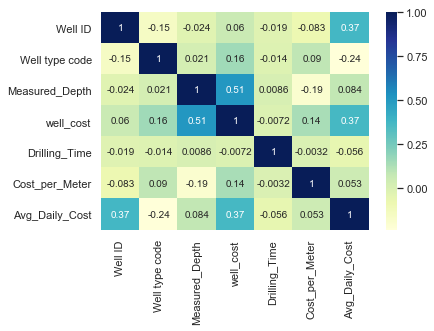

In [15]:
## see correlation
features_to_use = ['Well ID','Well type code','Operator','Measured_Depth','well_cost','Drilling_Time','Cost_per_Meter','Avg_Daily_Cost']
features = df[features_to_use]
corr = features.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, cmap="YlGnBu")

the depth and cost has the most high correlation, plot correlation between them

In [16]:
# group by Well_ID
Well_ID_grouped = df.groupby('Well ID')[['well_cost','Measured_Depth','Cost_per_Meter','Avg_Daily_Cost']].mean()
Well_ID_grouped

,well_cost,Measured_Depth,Cost_per_Meter,Avg_Daily_Cost
Well ID,,,,
8.800000e+13,7.523772e+05,5973.842302,125.137512,38743.031586
8.900000e+13,7.805533e+05,5286.390681,8208.252085,43440.198420
9.000000e+13,4.494366e+05,4046.500000,110.935873,19974.960877
9.100000e+13,6.659640e+05,5269.482158,107.678998,46191.950793
9.200000e+13,2.303148e+06,17922.279600,174.397161,37206.916791
9.300000e+13,1.082476e+06,11398.250000,89.366483,48110.059014
9.500000e+13,8.347796e+05,5234.024465,161.732511,67532.481291
9.900000e+13,4.654816e+05,4469.578947,104.650144,61566.306059


The second one has very high cost per meter than the others.

Text(0.5, 0, 'Measured_Depth')

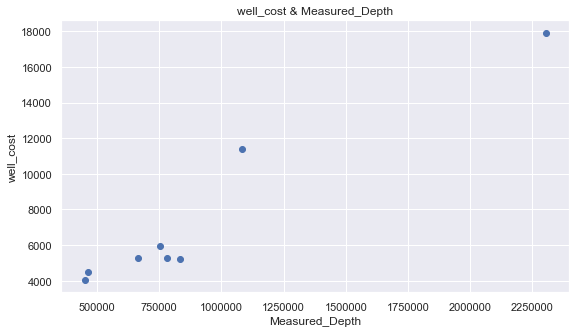

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
x =  Well_ID_grouped['well_cost']
y =  Well_ID_grouped['Measured_Depth']
#plot scatter between cost and depth
plt.scatter(x,y,color='b')
plt.title('well_cost & Measured_Depth')
plt.ylabel('well_cost')
plt.xlabel('Measured_Depth')

In [18]:
# group by Well_type
Well_type_grouped = df.groupby('Well type code')[['well_cost','Measured_Depth','Cost_per_Meter','Avg_Daily_Cost']].mean()
Well_type_grouped

,well_cost,Measured_Depth,Cost_per_Meter,Avg_Daily_Cost
Well type code,,,,
0,7.341849e+05,5489.376073,1883.021372,53449.186902
1,2.538925e+06,12334.500000,204.703998,61484.158110
2,8.741440e+05,5649.320845,6083.551917,38912.270747


the well type of UN is the deepest one, and the cost per meter is smallest one.

In [19]:
Well_field_grouped = df.groupby('Field_Name')[['well_cost','Measured_Depth','Cost_per_Meter','Avg_Daily_Cost']].mean()
Well_field_grouped

,well_cost,Measured_Depth,Cost_per_Meter,Avg_Daily_Cost
Field_Name,,,,
25 De Mayo - Medanito Sudeste (VEI),5.388057e+05,4548.857143,118.312217,67169.358362
Agua Botada (BOT),5.080372e+05,6536.500000,67.451174,5701.061229
Aguada Arenosa (Z007),2.687357e+05,4219.000000,63.696532,11684.159487
Aguada Bandera (Z008),9.324183e+05,6530.397333,143.513820,72976.688172
Aguada De Los Indios (AIN),1.831197e+06,10167.000000,180.111868,96378.808474
Aguada De Los Indios Sur (AINS),1.743579e+06,10515.000000,165.818224,83027.553571
Alto De Yariguarenda (ADY),2.309404e+06,7217.000000,319.995031,79634.625379
An-Aike (AKE),1.643138e+06,10367.000000,158.496968,73028.358622
Angostura (ATUR),7.574716e+05,6696.000000,113.122995,33665.403342


In [20]:
print('max cost per meter of field')
print(np.argmax(Well_field_grouped['Cost_per_Meter'], axis=1))
print(Well_field_grouped['Cost_per_Meter'].max())

print('min cost per meter of field')
print(np.argmin(Well_field_grouped['Cost_per_Meter'], axis=1))
print(Well_field_grouped['Cost_per_Meter'].min())

print('max cost per day of field')
print(np.argmax(Well_field_grouped['Avg_Daily_Cost'], axis=1))
print(Well_field_grouped['Avg_Daily_Cost'].max())

print('min cost per day of field')
print(np.argmin(Well_field_grouped['Avg_Daily_Cost'], axis=1))
print(Well_field_grouped['Avg_Daily_Cost'].min())

max cost per meter of field
Caleta Cordova (CCO)
152758.39441765306
min cost per meter of field
Cajon De Molina (MLN)
52.3213560631204
max cost per day of field
Cerro Guadal Norte (Z092)
133412.04548
min cost per day of field
Puntilla Del Huincan (PUN)
4028.380353488372


C:\Users\yingy\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
C:\Users\yingy\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


In [21]:
Well_Operator_grouped = df.groupby('Operator')[['well_cost','Measured_Depth','Cost_per_Meter','Avg_Daily_Cost']].mean()
Well_Operator_grouped

,well_cost,Measured_Depth,Cost_per_Meter,Avg_Daily_Cost
Operator,,,,
Capex,1.743816e+06,9186.000000,189.834055,78342.356824
Chanares Herrados,1.829031e+06,12165.181818,151.682003,75931.385719
Chevron Argentina S.R.L.,1.229239e+06,8231.000000,149.378134,54632.848474
Compan?a General DE Combustibles,1.208412e+06,6515.000000,189.366440,53707.219273
Compan?as Asociadas Petroleras,6.748398e+05,3768.684194,10644.145933,29992.880906
Cri Holding,4.861482e+05,2333.247650,227.937644,21606.587835
Dapetrol,1.136164e+06,5644.666667,201.845280,50496.193800
Enap Sipetrol Argentina,9.715866e+05,6503.779952,12852.715605,43181.626716
Geopark Argentina,1.269930e+06,11118.000000,114.222913,56441.348667


In [22]:
print('max cost per meter of operator')
print(np.argmax(Well_Operator_grouped['Cost_per_Meter'], axis=1))
print(Well_Operator_grouped['Cost_per_Meter'].max())

print('min cost per meter of operator')
print(np.argmin(Well_Operator_grouped['Cost_per_Meter'], axis=1))
print(Well_Operator_grouped['Cost_per_Meter'].min())

print('max cost per day of operator')
print(np.argmax(Well_Operator_grouped['Avg_Daily_Cost'], axis=1))
print(Well_Operator_grouped['Avg_Daily_Cost'].max())

print('min cost per day of operator')
print(np.argmin(Well_Operator_grouped['Avg_Daily_Cost'], axis=1))
print(Well_Operator_grouped['Avg_Daily_Cost'].min())

max cost per meter of operator
Interenergy Argentina
152758.39441765306
min cost per meter of operator
Roch
69.13717849624393
max cost per day of operator
Petrolera Entre Lomas
91671.52694915916
min cost per day of operator
Petrolera Del Comahue
9444.991148


In [23]:
Well_state_grouped = df.groupby('state_name')[['well_cost','Measured_Depth','Cost_per_Meter','Avg_Daily_Cost']].mean()
Well_state_grouped

,well_cost,Measured_Depth,Cost_per_Meter,Avg_Daily_Cost
state_name,,,,
Chubut,7.805533e+05,5286.390681,8208.252085,43440.198420
La Pampa,4.654816e+05,4469.578947,104.650144,61566.306059
Mendoza,7.523772e+05,5973.842302,125.137512,38743.031586
Neuquén,4.494366e+05,4046.500000,110.935873,19974.960877
Río Negro,6.659640e+05,5269.482158,107.678998,46191.950793
Salta,2.303148e+06,17922.279600,174.397161,37206.916791
San Juan,1.082476e+06,11398.250000,89.366483,48110.059014
Santa Cruz,8.347796e+05,5234.024465,161.732511,67532.481291


Chubut has the highest cost per meter.

# geo clustering

In [24]:
points = []
for i in range(1982):
    a=[df.iloc[i,5],df.iloc[i,6]]
    points.append(a)

In [25]:
import hdbscan
rads = np.radians(points)
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='haversine')
cluster_labels = clusterer.fit_predict(points)

In [26]:
points=np.array(points)

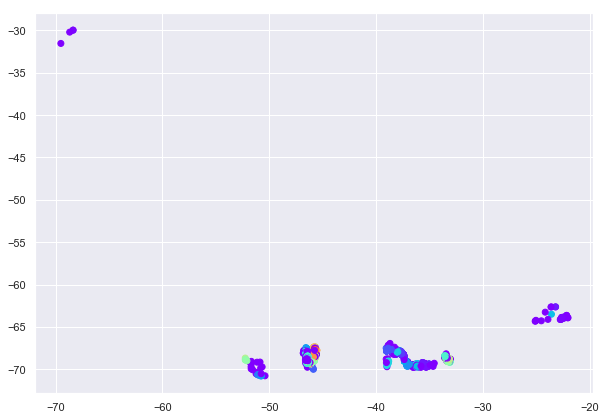

In [27]:
from sklearn import cluster, datasets
plt.figure(figsize=(10, 7))
plt.scatter(points[:,0], points[:,1], c=cluster_labels, cmap='rainbow')